# Exercises Week 41
--- 

In [3]:
import numpy as np
from random import random, seed 
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

In [4]:
def exact(x: float | np.ndarray) -> float | np.ndarray:
    return 3*x**2 + 2*x + 4

## 1. Gradient Descent with Fixed Learning Rate 

In [13]:
def gradient_descent(X, y, β, η, n, N_iterations):
    for _ in range(N_iterations):
        grad = 2/n * X.T @ (X @ β - y)
        β -= η*grad
        
    return β

def plot_RMSE(RMSE: np.ndarray[np.ndarray, np.ndarray], η: np.ndarray, N_iterations: np.ndarray, cmap: str = 'plasma', norm: str = "linear") -> None:
    
    plt.imshow(RMSE, cmap=cmap, norm=norm)
    plt.colorbar(label='RMSE' )
    plt.xticks(range(len(N_iterations)), N_iterations.astype(int))
    plt.yticks(range(len(η)), η)
        
    if 'log' in norm:
        plt.xlabel('N_iterations (logscale)')
        plt.ylabel('η (logscale)')
        
    else:
        plt.xlabel('N_iterations')
        plt.ylabel('η')
        
    plt.show()

In [12]:
print('log' in 'log')

True


### OLS

RMSE: 0.09121242021579017


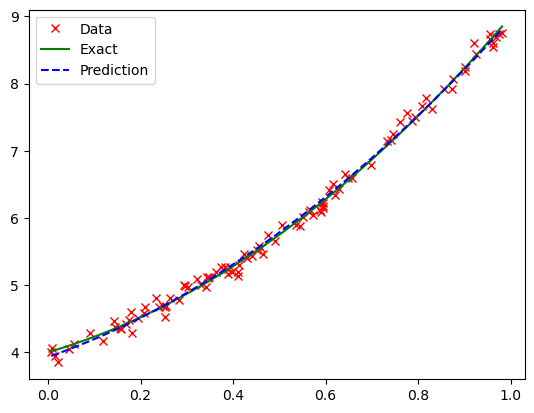

In [6]:
n = 100
N_iterations = 1000
x = np.sort(np.random.rand(n, 1), axis=0)
y = exact(x) + 0.1*np.random.randn(n, 1)

X = np.c_[np.ones((n, 1)), x, x**2]
H = 2/n * X.T @ X
eigenvalues = np.linalg.eigvals(H)
η = 1/max(eigenvalues)

β_guess = np.random.randn(3, 1)
β = gradient_descent(X, y, β_guess, η, n, N_iterations)

y_pred = X @ β

print(f'RMSE: {root_mean_squared_error(y, y_pred)}')
plt.plot(x, y, 'rx', label='Data')
plt.plot(x, exact(x), 'g', label='Exact')
plt.plot(x, y_pred, 'b--', label='Prediction')
plt.legend()

In [7]:
η = np.logspace(-5, -1, 5)
N_iterations = np.logspace(2, 5, 4)
RMSE = np.zeros((len(η), len(N_iterations)))
for i, η_i in enumerate(η):
    for j, N_j in enumerate(N_iterations):
        β_guess = np.random.randn(3, 1)
        β = gradient_descent(X, y, β_guess, η_i, n, int(N_j))
        y_pred = X @ β
        RMSE[i, j] = root_mean_squared_error(y, y_pred)

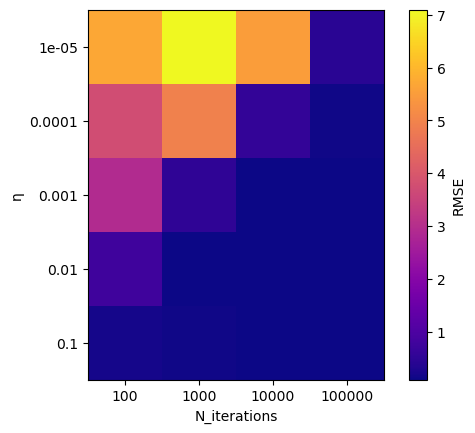

In [16]:
plot_RMSE(RMSE, η, N_iterations)

#### Comments on plot
- The number of iterations seems to be less important than the learning rate. A larger learning rate seems to the be the determining factor to lower the RMSE. 
- Too small of a learning rate makes the error increase drastically.

### 

## 2. Gradient Descent with Momentum

In [9]:
def derivative(x):
    return 6*x + 2

def gradient_descent_momentum(exact, derivative, bounds, N_iterations, step_size):
    solutions, scores = [], []
    interval = bounds[1] - bounds[0]
    # Generating initial guess
    solution = bounds[0] + random(len(bounds)) * interval 
    
    for _ in range(N_iterations):
        gradient = derivative(solution)
        solution -= step_size * gradient
        solutions.append(solution)
        scores.append(exact(solution))
    